
# Практическая работа №1: Исследование алгоритмов формирования аддитивных цепочек
Выполнил студент гр. 9383 Нистратов Дмитрий, вариант 101.

## Цель работы

Формирование представления о аддитивных цепочках, выработать умение составлять и применять алгоритмы для нахождения минимальных аддитивных цепочек для заданного числа, привить навык использования систем компьютерной алгебры для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод
Бинарный метод является методом быстрого возведения числа в степень. Алгоритм вычисления является следующим:
* Число переводится в битовую запись и отбрасывается старший бит
* Проверяется каждый бит числа
* Если бит равен 1, то число R возводится в квадрат и домножается на первоночальное число a. Формула: $ R^2*a$
* Если бит равен 0, то число R возводится в квадрат. Формула:  $ R^2$

### Метод множителей
Метод множителей является методом быстрого возведения числа в степень, базирующийся на бинарном методе. Степень разбивается на два простых числа $n = k * m$, далее возводится число в степень $k$, а затем в степень $n - 1$.

### Алгоритм Брауэра 
Алгоритм Брауэра находит аддитивную цепочку для задданого выражения
При $k < \log_{2}{\log_{2}{n}}$ справедливо неравенство
$l(n) < (1 + \frac{1}{k})[\log_{2}{n}]+2^{k-1}-k+2$

### Алгоритм дробления вектора индексов
Алгоритм дробления индексов находит минимальную звездную цепочку для числа n.

Пусть существует звездная цепочка длинны $l(n) = m - 1$. Тогда для каждоый цепочки можно задать вектор индексов вида $r1, r2, ..., r$.

Для поиска минимальной звездной цепочки осуществляется перебор, затем вычисляются наименьшее и наибольшее значение $a$. Если $a == n$, то минимальная цепочка найдена, иначе осущевляется перебор по набору $r$, пока не будет найдена минимальная цепочка.
### Следсвия из теоремы Брауэра
Следсвие 1: $\lim_{n \rightarrow inf}\frac{l(n)}{\lambda(n)}= 1$

Следствие 2: $\lambda(n)(1+\frac{1}{\lambda(\lambda(n))}+\frac{o\lambda(\lambda(\lambda(n)))}{\lambda(\lambda(n^2))})$
### Гипотеза Шольца-Брауэра
$l^\star(2^n-1) \leq l^\star(n)+n-1$
## Постановка задачи с кратким описанием выполнения работы
1. Применить бинарный метод и метод множителей для xn, где n⩾30, для 2-3 значений n (значения n выбирается студентом самостоятельно). Сравнить количество операций для каждого метода, сделать выводы.
2. Реализовать алгоритм Брауэра (для нечётных вариантов) или алгоритм Яо (для чётных вариантов) для вычисления приближённых аддитивных цепочек для различных чисел при варьировании параметра k, сопоставить длины полученных аддитивных цепочек с минимальной аддитивной цепочкой для заданного числа. Сделать выводы.
3. Реализовать алгоритм дробления вектора индексов для нахождения минимальной звёздной цепочки для заданного числа. Протестировать алгоритм при n>500. Указать, сколько времени потребовалось на поиск цепочки и какая цепочка получилась. Сравнить с предыдущими методами, сделать выводы.
4. Проверить следствие 1 теоремы Брауэра для n=1..200 путём построения функции l(n) и аппроксимирующей кривой, полученной с помощью метода наименьших квадратов. Сопоставить функции на одном графике, сделать выводы.
5. Проверить гипотезу Шольца–Брауэра для 1<n⩽10 на алгоритме дробления вектора индексов. Сделать выводы.
6. Дополнительное необязательное задание: найти и/или предложить модификации алгоритмов и привести описание модификаций. Реализовать модифицированные алгоритмы и сравнить их мощность.

## Решение задач вычисления степеней бинарным методом и методом множителей.
### Бинарный метод

In [1]:
def BinaryMethod(a, n):
    R = a
    steps = 0
    for i in bin(n)[3:]:
        if i == '1':
            R *= R * a
            steps += 2
        else:
            R *= R
            steps += 1
    return R, steps

### Метод множителей

In [2]:
def MulMethod(a, n):
    f = factor(n)[0][0]
    tmp, steps = BinaryMethod(a, f)
    tmp2, steps2 = BinaryMethod(tmp, n // f)
    return tmp2, steps + steps2

## Сравнение
Заполним таблицу для сравнения работы бинарного метода и метода множителей.

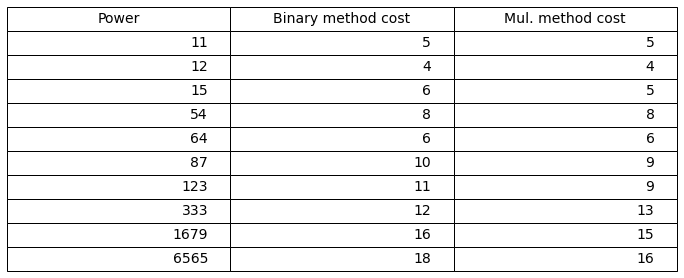

In [3]:
import pylab as plot 
x = 15

y = [11, 12, 15, 54, 64, 87, 123, 333, 1679, 6565]

columns = ("Power", "Binary method cost", "Mul. method cost")

cell_text = []
for i in range(len(y)):
    cell_text.append([y[i], BinaryMethod(x, y[i])[1], MulMethod(x, y[i])[1]])
    

table = plot.table(cellText=cell_text, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(2, 2)

ax = plot.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plot.box(on=None)
plot.draw()

## Вывод
Из таблицы видно, чтометод множителей лучше бинарного при $n = 2^k - 1$, но хуже при $n = 2^k + 1$.В остальных случиях работы методов одинаковы.

## Реализация алгоритма Брауэра

In [4]:
def Brouwer(n, k):
    chain = []
    q = n
    while q > (2**k)-1:
        if q not in chain:
            chain.append(q)
        q = q//(2**k)
        for i in range(2, 2**k + 1, 2):
            if i*q not in chain:
                chain.append(i*q)
    for i in range(1, 2**k):
        if i not in chain:
            chain.append(i)
    chain.sort()
    return chain

Результаты работы алгоритма Брауэра при разных k:

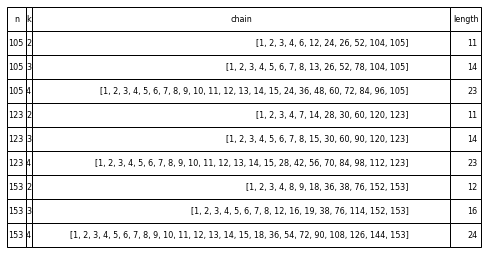

In [5]:
import pylab as plot
n = [105, 123, 153]
k = [2, 3, 4]

columns = ("n", "k", "chain", "length")

cell_text = []
for i in range(len(n)):
    for j in range(len(k)):
        temp = Brouwer(n[i], k[j])
        cell_text.append([n[i], k[j], temp, len(temp)])
    

table = plot.table(cellText=cell_text, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(5, 2) 
table.auto_set_column_width([0,1,3])

ax = plot.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plot.box(on=None)
plot.draw()

## Вывод
Параметр k влияет на длинну аддитивной цепочки получаемой алгоритмом Брауэра. Иногда цепочка Брауэра совпадала с минимальной по длинне, однако не гарантированно, что алгоритм Брауэра найдет минимальную аддитивную цепочку.

## Реализация метода дробления вектора индексов

In [6]:
def getStarChain(r, ro):
    star_chain = [1]
    for i in r + ro:
        star_chain.append(star_chain[-1] + star_chain[i - 1])
    return star_chain

def getVectorIndex(vector, q=0):
    for i in range(len(vector) - 1, -1, -1):
        if vector[i] != 1:
            vector[i] -= 1
            for j in range(i + 1, len(vector)):
                vector[j] =  q + j + 1
            return vector
    return [-1]

def SplitVectorIndexed(n):
    for m in range(floor(log(n, 2)) - 1 , floor(log(n, 2)) + bin(n)[2:].count('1')):
        q = m // 2
        
        if q == 0:
            q = 1
            
        r = [i for i in range(1, q + 1)]    
        while(r != [-1]):
            ro = [(q + i) for i in range(1, m - q + 1)]   
            star_chain = getStarChain(r, ro)
            if star_chain[-1] == n:
                return star_chain
            a_min = star_chain[q] + m - q
            a_max = star_chain[q] * (2 ** (m - q))
            if n > a_min and n < a_max :
                while(ro != [-1]):
                    ro = getVectorIndex(ro, q)
                    star_chain = getStarChain(r, ro)
                    if star_chain[-1] == n:
                        return star_chain
            r = getVectorIndex(r)
    return star_chain    

Сведения о поиске цепочки и времени работы алгоритма в таблице:

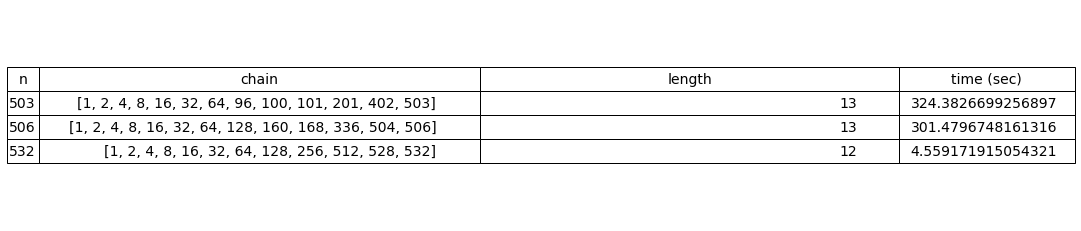

In [7]:
import pylab as plot
import time

n = [503, 506, 532]

columns = ("n","chain", "length", "time (sec)")

cell_text = []
for i in range(len(n)):
    start = time.time()
    temp = SplitVectorIndexed(n[i])
    end = time.time()
    cell_text.append([n[i], temp, len(temp), end - start])
    

table = plot.table(cellText=cell_text, colLabels=columns, loc='center')
table.set_fontsize(14)
table.scale(5, 2) 
table.auto_set_column_width([0,1,3])

ax = plot.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plot.box(on=None)
plot.draw()

## Вывод
Метод дробления векторов индексов гарантирует нахождение минимальной звездной цепочки, но не является эффективным, из-за больших затрат по времени.

## Проверка следствия Брауэра

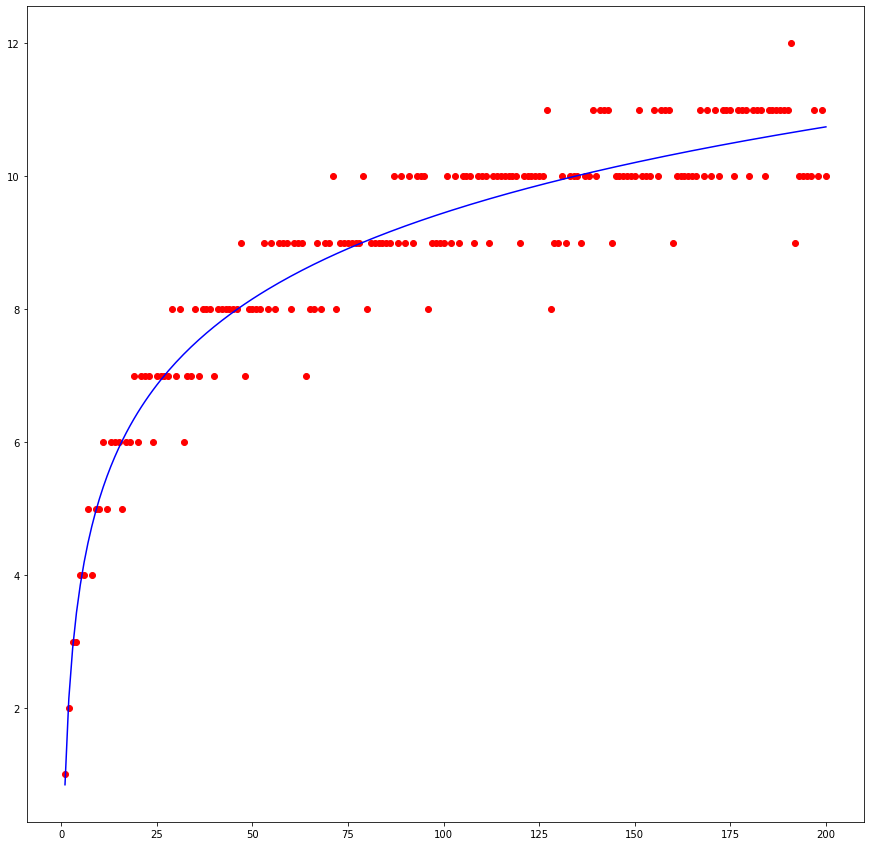

In [8]:
import pylab as plot 
    
n = []
l = []
for i in range(1, 201):
    n.append(i)
    l.append(len(SplitVectorIndexed(i)))

m = matrix([[sum([float((math.log(i)**2)) for i in n]), sum([float(math.log(i)) for i in n])], [sum([float(math.log(i)) for i in n]), len(n)]])
vec = vector([sum([float(l[i] * math.log(n[i])) for i in range(len(n))]), sum(l)])
solution = m.solve_right(vec)

plot.figure(figsize=(15, 15))
plot.scatter(n, l, color = 'r', marker = 'o')
plot.plot(n, [solution[0] * math.log(i) + solution[1] for i in n], color = 'b')
plot.show()

### Вывод 
Значение длин аппроксимируется логарифмической кривой, что подтверждает следсвие теоремы Брауэра, что значение длины аддитивной цепочки и фунции логарифма равны на бесконечности.

## Проверка гипотезы Шольца-Брауэра
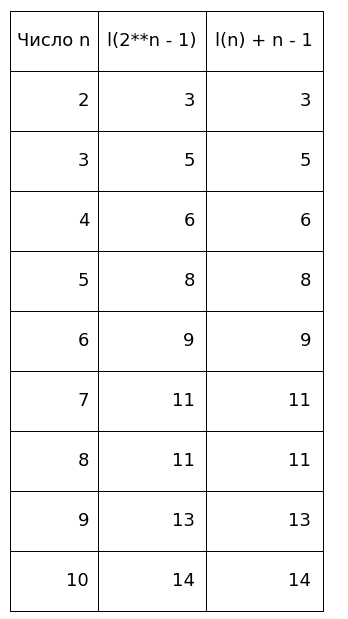
## Вывод 
Из таблицы выше можно сделать вывод, что гипотеза Шольца-Брауэра верна для $2 \leq n \leq 10 $

## Общий вывод по проделанной работе
   В ходе выполнения работы было изучено нахождение аддитивных цепочек для задданного числа, а также написаны следующие методы: бинарный метод и метод множителя возведения в степень числа, алгоритм Брауэра, алгоритм дробления вектора индексов. Были проведены проверки следствия теоремы Брауэра и гипотезы Шольца-Брауэра.